This tutorial shows how the contributions of different drivers are quantified. The output datafile from the tutorial 'demo_vulnerability_assessment' is required as an input.

In [36]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import matplotlib.pyplot as plt
from scipy import stats
vul_data = pd.read_csv('~/projects/NC_Submission/Climada_papers/Test/DEMO_VulnerabilityTimeSeriesSubregions.csv')

In [5]:

def normalise(dataFrame):
    """normalise all the model median data to observed damage"""
    for dis in ['Pos', 'Neg']:
        # Norm_D_Full can be used as it is already normalised to observed damage
        norm_CliExp = dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_Full_{}'.format(dis)].mean() / \
            dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_CliExp_{}'.format(dis)].mean()

        dataFrame['TNorm_D_CliExp_{}'.format(dis)] = dataFrame['D_CliExp_{}'.format(dis)] * norm_CliExp

        norm_1980 = dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_Full_{}'.format(dis)].mean() / \
            dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_1980_{}'.format(dis)].mean()

        dataFrame['TNorm_D_1980_{}'.format(dis)] = dataFrame['D_1980_{}'.format(dis)] * norm_1980

        norm_2010 = dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_Full_{}'.format(dis)].mean() / \
            dataFrame.loc[dataFrame['Year'] >= 1980, 'Norm_D_2010_{}'.format(dis)].mean()

        dataFrame['TNorm_D_2010_{}'.format(dis)] = dataFrame['D_2010_{}'.format(dis)] * norm_2010


    return dataFrame

In [22]:
def rel_time_attr_MK(dataFrame71, dis):
    """
    Theil-Sen-Slope estimation and Mann-Kendall-Test to estimate the
    contribution of each driver!

    Parameters
    ----------
    dataFrame71 : time series
        Time series.
    dis : string
        discharge group

    Returns
    -------
    regH : List MK-output
        Sen_slope and MK-test result with uncertainty range of hazard
        (with 1980 fixed exposure)(TS_Haz) 1980-2010
    regHE : List MK-output
        Sen_slope and MK-test result with uncertainty range of TS_HazExp
        1980-2010
    regF : List MK-output
        Sen_slope and MK-test result with uncertainty range of TS_Full
        1980-2010.
    regH7 : List MK-output
        Sen_slope and MK-test result with uncertainty range of hazard
        (with 1980 fixed exposure)(TS_Haz) 1971-2010
    regH107 : List MK-output
        Sen_slope and MK-test result with uncertainty range of hazard
        (with 2010 fixed exposure)(TS_Haz) 1971-2010
    regH10 : List MK-output
        Sen_slope and MK-test result with uncertainty range of hazard
        (with 2010 fixed exposure)(TS_Haz) 1980-2010
    regE : List MK-output
        Sen_slope and MK-test result with uncertainty range of exposure
        difference function (TS_HazExp - TS_Haz) 1980-2010 (not used)
    regE7 : List MK-output
        Sen_slope and MK-test result with uncertainty range of exposure
        difference function (TS_HazExp - TS_Haz) 1971-2010 (not used)
    regV : List MK-output
        Sen_slope and MK-test result with uncertainty range of vulnerability
        difference function (TS_full - TS_Haz_Exp)(not used)
    regI : List MK-output
        Sen_slope and MK-test result with uncertainty range of modeled damges
        (including vulnerability)
    regN : List MK-output
        Sen_slope and MK-test result with uncertainty range of observed damages

    """

    dataFrame = dataFrame71[dataFrame71['Year'] > 1979]
    
    # Estimate trend in Time Series D_CliExp

    regCliExp = mk.original_test(dataFrame['TNorm_D_CliExp_{}'.format(dis)],
                                  alpha=0.1)
    slopeCliExp = stats.theilslopes(dataFrame['TNorm_D_CliExp_{}'.format(dis)],
                                     alpha=1/3)

    regCE = [regCliExp.slope, regCliExp.p, slopeCliExp[2], slopeCliExp[3]]

    # Estimate trend in Time Series D_Full
    
    regLFull = mk.original_test(dataFrame['Norm_D_Full_{}'.format(dis)],
                                alpha=0.1)

    slopeLFull = stats.theilslopes(dataFrame['Norm_D_Full_{}'.format(dis)],
                                   alpha=1/3)

    regF = [regLFull.slope, regLFull.p, slopeLFull[2], slopeLFull[3]]
    
    # Estimate trend in Time Series D_1980 (starting in 1980)

    regC = mk.original_test(dataFrame['TNorm_D_1980_{}'.format(dis)],
                              alpha=0.1)

    slopeC = stats.theilslopes(dataFrame['TNorm_D_1980_{}'.format(dis)],
                                 alpha=1/3)

    regC = [regC.slope, regC.p, slopeC[2], slopeC[3]]
    
    # Estimate trend in Time Series D_1980 (starting in 1971)

    regC7 = mk.original_test(dataFrame71['TNorm_D_1980_{}'.format(dis)], alpha=0.1)

    slopeC7 = stats.theilslopes(dataFrame71['TNorm_D_1980_{}'.format(dis)],
                                  alpha=1/3)
    regC7 = [regC7.slope, regC7.p, slopeC7[2], slopeC7[3]]
    
    # Estimate trend in Time Series D_2010 (starting in 1971)

    regC107 = mk.original_test(dataFrame71['TNorm_D_2010_{}'.format(dis)],
                                 alpha=0.1)

    slopeC107 = stats.theilslopes(dataFrame71['TNorm_D_2010_{}'.format(dis)],
                                    alpha=1/3)

    regC107 = [regC107.slope, regC107.p, slopeC107[2], slopeC107[3]]

    
    # Estimate trend in Time Series D_2010 (starting in 1980)
    regC10 = mk.original_test(dataFrame['TNorm_D_2010_{}'.format(dis)],
                                alpha=0.1)

    slopeC10 = stats.theilslopes(dataFrame['TNorm_D_2010_{}'.format(dis)],
                                   alpha=1/3)

    regC10 = [regC10.slope, regC10.p, slopeC10[2], slopeC10[3]]
    
    # Estimate trend in Time Series D_Obs (starting in 1980)


    regN = mk.original_test(dataFrame['D_obs_dummy_{}'.format(dis)],
                              alpha=0.1)

    slopeN = stats.theilslopes(dataFrame['D_obs_dummy_{}'.format(dis)],
                                 alpha=1/3)

    regN = [regN.slope, regN.p, slopeN[2], slopeN[3]]

    return regC, regCE, regF, regC7, regC107, regC10,regN

In [54]:
vul_data = normalise(vul_data)

regC_Pos, regCE_Pos, regF_Pos, regC7_Pos, regC107_Pos, regC10_Pos,regN_Pos = rel_time_attr_MK(vul_data, 'Pos')

regC_Neg, regCE_Neg, regF_Neg, regC7_Neg, regC107_Neg, regC10_Neg,regN_Neg = rel_time_attr_MK(vul_data, 'Neg')

In [59]:
# get attribution for LAM+

# First get normalisation factor
nat_norm = np.nanmean(vul_data.loc[(vul_data['Year'] > 1979) & (vul_data['Year'] < 1996),
                        'D_obs_dummy_Pos'])

nat_norm_neg = np.nanmean(vul_data.loc[(vul_data['Year'] > 1979) & (vul_data['Year'] < 1996),
                        'D_obs_dummy_Neg'])

#calculate attribution of each driver

# all climate contributionsnat_norm = np.nanmean(data.loc[(data['Year'] > 1979) & (data['Year'] < 1996),
                        'natcat_damages_2005_CPI_{}'.format(dis)])
c_norm = regC_Pos[0]*100/nat_norm

c7_normCL = regC7_Pos[0]*100/nat_norm

c10_normCL = regC10_Pos[0]*100/nat_norm

c107_normCL = regC107_Pos[0]*100/nat_norm

# exposure contribution
e_norm = (regCE_Pos[0]-regC_Pos[0])*100/nat_norm
# vulnerability contribution
v_norm = (regF_Pos[0]-regCE_Pos[0])*100/nat_norm

# modeled damage trend
m_norm = regF_Pos[0]*100/nat_norm
# observed damage trend
n_norm = regN_Pos[0]*100/nat_norm


([<matplotlib.axis.XTick at 0x7faf723aae10>,
 <a list of 4 Text xticklabel objects>)

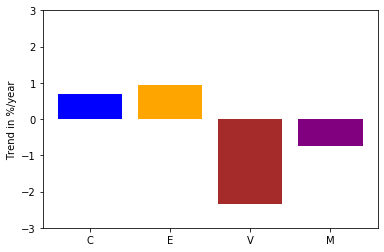

In [48]:
plt.bar([0,1,2,3],[c_norm, e_norm, v_norm, m_norm], color = ['blue', 'orange', 'brown', 'purple'])
plt.ylim([-3,3])
plt.ylabel('Trend in %/year')
plt.xticks([0,1,2,3],['C','E','V','M'])
# 

Text(0.5, 1.0, 'Climate contributions in Latin America')

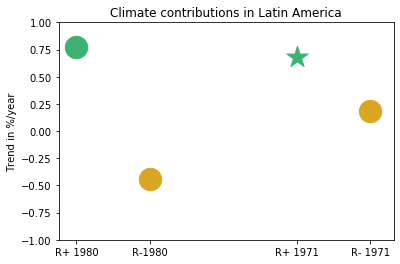

In [84]:
# looking at 2010 fixed exposure climate contributions

c10_norm_Neg = regC10_Neg[0]*100/nat_norm_neg

c107_norm_Neg = regC107_Neg[0]*100/nat_norm_neg

# get significance 
c10_Pos_sig = regC10_Pos[1]
c107_Pos_sig = regC107_Pos[1]

c10_Neg_sig = regC10_Neg[1]
c107_Neg_sig = regC107_Neg[1]

signs = [c10_Pos_sig, c10_Neg_sig, c107_Pos_sig, c107_Neg_sig]
magn = [c10_normCL, c10_norm_Neg, c107_normCL, c107_norm_Neg]
x = [0,1,3,4]
col = ['mediumseagreen', 'goldenrod','mediumseagreen', 'goldenrod']
for i in range(4):
    if signs[i] < 0.1:
        plt.scatter(x[i],magn[i], marker = '*', s =500, c = col[i])
    else:
        plt.scatter(x[i],magn[i], s =500, c = col[i])

plt.ylim([-1,1])
plt.ylabel('Trend in %/year')
plt.xticks([0,1,3,4],['R+ 1980','R-1980','R+ 1971','R- 1971'])
plt.title('Climate contributions in Latin America')

As we can see, we get the significant climate trend indicated by the star over the longer time period 1971 -2010 in LAM+
Differences in the absolute numbers arise from the normalisation on dummy data

For the last tutorial (demo_teleconnections.ipynb) we can now just use the same input dataset as for this tutorial